In [1]:
import numpy as np

from qiskit import pulse
from qiskit.circuit import Parameter

from qiskit_experiments.test.pulse_backend import SingleTransmonTestBackend
from qiskit_experiments.data_processing import DataProcessor, nodes
from qiskit_experiments.library import Rabi

with pulse.build() as sched:
    pulse.play(
        pulse.Gaussian(160, Parameter("amp"), sigma=40),
        pulse.DriveChannel(0)
    )

backend = SingleTransmonTestBackend(seed=100)

exp = Rabi(
    qubit=0,
    backend=backend,
    schedule=sched,
    amplitudes=np.linspace(-0.1, 0.1, 21)
)

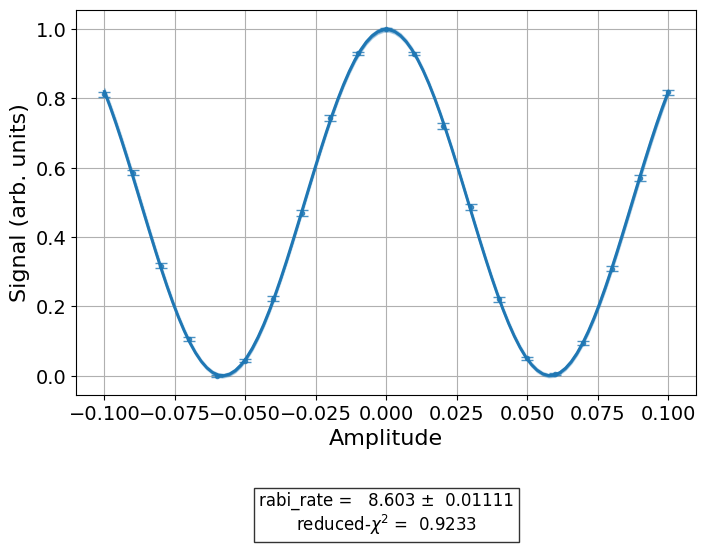

In [2]:
data_nodes = [nodes.SVD(), nodes.AverageData(axis=1), nodes.MinMaxNormalize()]
iq_processor = DataProcessor("memory", data_nodes)
exp.analysis.set_options(data_processor=iq_processor)

exp_data = exp.run(meas_level=1, meas_return="single").block_for_results()

display(exp_data.figure(0))

In [3]:
%matplotlib inline

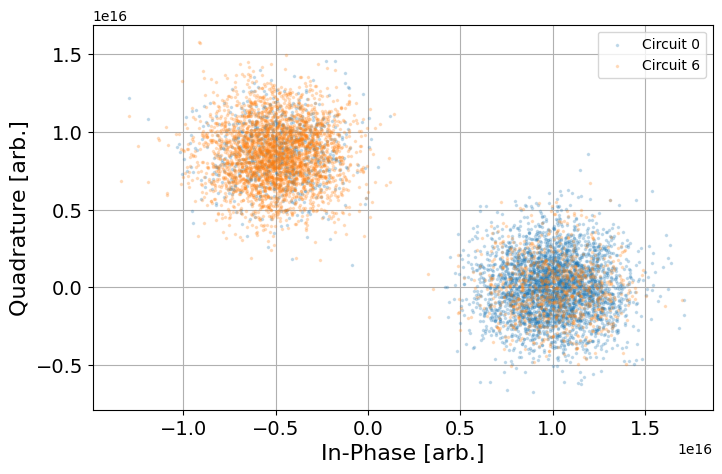

In [4]:
from qiskit_experiments.visualization import IQPlotter, MplDrawer

plotter = IQPlotter(MplDrawer())

for idx in [0, 6]:
    plotter.set_series_data(
        f"Circuit {idx}",
        points=np.array(exp_data.data(idx)["memory"]).squeeze(),
    )

plotter.figure()

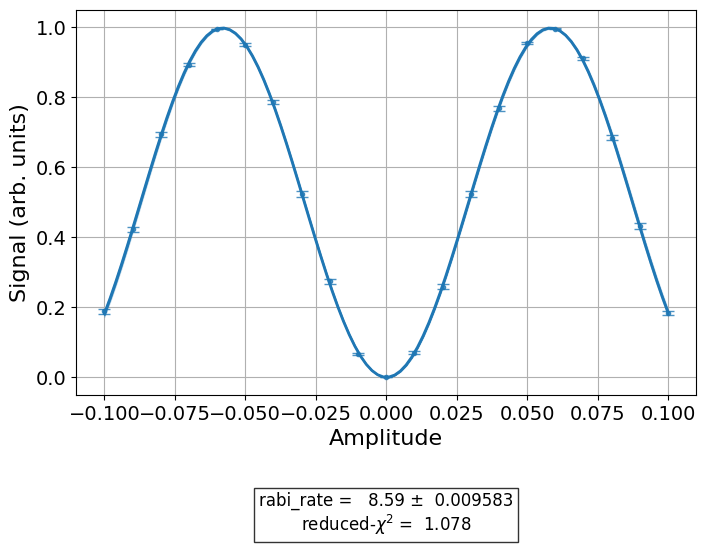

In [5]:
data_nodes = [nodes.Probability(outcome="1")]
count_processor = DataProcessor("counts", data_nodes)
exp.analysis.set_options(data_processor=count_processor)

exp_data = exp.run(meas_level=2).block_for_results()

display(exp_data.figure(0))